# Data Analysis Project
## Members: Chidvi Doddi, Diana Bui, and Susanna Morin
## Group name: Race Against the Machine
## Data set: NYPD SQF Dataset

Data Analysis Project, done by Chidvi Doddi, Diana Bui, and Susanna Morin

## Objective
###In this project, we look at the NYPD's 2019 Stop, Question, and Frisk Database.
[Dataset can be found here](https://www1.nyc.gov/site/nypd/stats/reports-analysis/stopfrisk.page) 

[TL;DR Version of Dataset](https://www.nyclu.org/en/stop-and-frisk-data)

The databse records all of the recorded NYPD's stop incidences and the details pertianing to each stop. Some of the items recorded include the description of the suspected crime, whether the officer was wearing a uniform, the suspect's demeanor, and the location of the stop. These incidents are recorded through an app that are then uploaded to the databse. 

#### We will be examining fairness definitions across different racial groups on this dataset. Using the techniques from class (module 3), we will present our findings.



---



# Onboarding Process

Resources: https://towardsdatascience.com/7-ways-to-handle-missing-values-in-machine-learning-1a6326adf79e

We begin by importing the libraries we will be using for this project. 

In [ ]:
# We import pandas, a Python library that allows us to read in common data formats such as .csv, .xlsx, etc... 
# as a dataframe, essentially a matrix of features.

import pandas as pd # Necessary libraries
import numpy as np
import warnings # Suppressing warnings
warnings.filterwarnings('ignore') 

In [ ]:
# read the csv file and create dataframes:

data = pd.read_csv("NYPD2019.csv")
data = data.fillna(value = 0) 
data.head()
#data.shape #(13459, 27)

,STOP_WAS_INITIATED,JURISDICTION_DESCRIPTION,OBSERVED_DURATION_MINUTES,SUSPECTED_CRIME_DESCRIPTION,STOP_DURATION_MINUTES,OFFICER_EXPLAINED_STOP_FLAG,OTHER_PERSON_STOPPED_FLAG,SUMMONS_ISSUED_FLAG,OFFICER_IN_UNIFORM_FLAG,FRISKED_FLAG,SEARCHED_FLAG,ASK_FOR_CONSENT_FLG,CONSENT_GIVEN_FLG,OTHER_CONTRABAND_FLAG,WEAPON_FOUND_FLAG,PHYSICAL_FORCE_VERBAL_INSTRUCTION_FLAG,SUSPECTS_ACTIONS_PROXIMITY_TO_SCENE_FLAG,SEARCH_BASIS_INCIDENTAL_TO_ARREST_FLAG,SUSPECT_REPORTED_AGE,SUSPECT_SEX,SUSPECT_RACE_DESCRIPTION,SUSPECT_HEIGHT,SUSPECT_WEIGHT,SUSPECT_BODY_BUILD_TYPE,STOP_LOCATION_SECTOR_CODE,STOP_LOCATION_BORO_NAME,SUSPECT_ARRESTED_FLAG
0,3,0.0,3,13.0,14,2,1,1,1,2,2,0.0,0.0,1,1,2.0,0.0,0.0,42.0,1.0,4.0,6.10,180.0,4.0,3.0,3,0
1,1,1.0,1,0.0,3,2,1,1,2,2,1,2.0,2.0,1,1,2.0,0.0,0.0,0.0,0.0,1.0,5.10,110.0,3.0,2.0,3,0
2,3,1.0,1,1.0,10,2,1,1,2,2,1,1.0,1.0,1,1,2.0,1.0,0.0,25.0,1.0,1.0,5.11,165.0,2.0,3.0,2,0
3,2,3.0,1,0.0,10,2,1,1,1,2,1,1.0,1.0,1,1,2.0,0.0,0.0,19.0,1.0,1.0,5.60,150.0,2.0,1.0,2,0
4,3,3.0,1,23.0,20,2,2,1,2,2,1,2.0,2.0,1,1,2.0,0.0,0.0,22.0,1.0,4.0,5.60,150.0,3.0,3.0,4,0




---



In the box above, we import the dataset's CSV into a pandas DataFrame and replace any Nan (empty) values with 0. However prior to this step, we **preprocessed/cleaned** the data manually. 

## Data Preprocessing
### Removal of features
During this process, we first removed features that:

1. Had sparse data: These columns were filled with a large amount of NULL cells.
> Some of the features dropped: FIREARM_FLAG, PHYSICAL_FORCE_DRAW_POINT_FIREARM_FLAG, PHYSICAL_FORCE_OC_SPRAY_USED_FLAG
2. Had too much noise: These columns were filled with unusable data and if we were to use these data, it would require extensive data cleaning.
> Some of the features dropped: SUSPECT_OTHER_DESCRIPTION, DEMEANOR_OF_PERSON_STOPPED
3. We were not interested in/do not believe was pertinent: These features were extraneous information (i.e. no suspect would be stopped because of these features). 
> Some of the features dropped: STOP_LOCATION_STREET_NAME, SUSPECT_HAIR_COLOR

In the original dataset, there were over 83 features. After this step, we were left with 27 features. 

### Feature Engineering
Resource: https://developers.google.com/machine-learning/crash-course/representation/feature-engineering

Feature engineering means transforming raw data into a feature vector. This is where we spent most of our time during the preprocessing stage, which is to be expected. Because models cannot use strings, we had to convert all strings in the dataset to numerical values. This process is called "Mapping Categorical Variables". So for each unique value in the feature, we mapped it to an integer value and kept track of these values on a separate database for data retracing.

> For example, the feature "OFFICER_EXPLAINED_STOP_FLAG" consisted of *Ys* for *Yes* and *Ns* for *No*. We mapped *Y* to 2 and *N* to 1. 

During this step, we also replaced all cells populated with the "NULL" value to 0 values. We did this to keep all of the dataset. We previously used the dropna function but this brought down the size of the dataset significantly.  






In [ ]:
#insert in original dataset for comparison

Note: We moved the feature/column named "SUSPECT_ARRESTED_FLAG" to the end. We did this for ease and emphasis on/with this column. For this project, we are using this feature as the label we are trying to predict.

In [ ]:
#cleaned data for comparison
data.head()

,STOP_WAS_INITIATED,JURISDICTION_DESCRIPTION,OBSERVED_DURATION_MINUTES,SUSPECTED_CRIME_DESCRIPTION,STOP_DURATION_MINUTES,OFFICER_EXPLAINED_STOP_FLAG,OTHER_PERSON_STOPPED_FLAG,SUMMONS_ISSUED_FLAG,OFFICER_IN_UNIFORM_FLAG,FRISKED_FLAG,SEARCHED_FLAG,ASK_FOR_CONSENT_FLG,CONSENT_GIVEN_FLG,OTHER_CONTRABAND_FLAG,WEAPON_FOUND_FLAG,PHYSICAL_FORCE_VERBAL_INSTRUCTION_FLAG,SUSPECTS_ACTIONS_PROXIMITY_TO_SCENE_FLAG,SEARCH_BASIS_INCIDENTAL_TO_ARREST_FLAG,SUSPECT_REPORTED_AGE,SUSPECT_SEX,SUSPECT_RACE_DESCRIPTION,SUSPECT_HEIGHT,SUSPECT_WEIGHT,SUSPECT_BODY_BUILD_TYPE,STOP_LOCATION_SECTOR_CODE,STOP_LOCATION_BORO_NAME,SUSPECT_ARRESTED_FLAG
0,3,0.0,3,13.0,14,2,1,1,1,2,2,0.0,0.0,1,1,2.0,0.0,0.0,42.0,1.0,4.0,6.10,180.0,4.0,3.0,3,0
1,1,1.0,1,0.0,3,2,1,1,2,2,1,2.0,2.0,1,1,2.0,0.0,0.0,0.0,0.0,1.0,5.10,110.0,3.0,2.0,3,0
2,3,1.0,1,1.0,10,2,1,1,2,2,1,1.0,1.0,1,1,2.0,1.0,0.0,25.0,1.0,1.0,5.11,165.0,2.0,3.0,2,0
3,2,3.0,1,0.0,10,2,1,1,1,2,1,1.0,1.0,1,1,2.0,0.0,0.0,19.0,1.0,1.0,5.60,150.0,2.0,1.0,2,0
4,3,3.0,1,23.0,20,2,2,1,2,2,1,2.0,2.0,1,1,2.0,0.0,0.0,22.0,1.0,4.0,5.60,150.0,3.0,3.0,4,0


In the following stage, we decided to drop more columns because we felt the dataset was still somewhat convoluted for our purpose. For what columns to drop, the choices made were influenced by the same thought process as above. After this step, our remaining dataframe consists of 740 feature vectors with 20 features. 

In [ ]:
#dropped columns further
data = data.drop(columns = ['OFFICER_EXPLAINED_STOP_FLAG', 'OFFICER_IN_UNIFORM_FLAG', 'SUMMONS_ISSUED_FLAG'])
data = data.drop(columns = ['OTHER_CONTRABAND_FLAG', 'SUSPECT_REPORTED_AGE', 'SUSPECT_HEIGHT', 'SUSPECT_WEIGHT'])

#print(data.shape) #13459 X 20

data.head()

,STOP_WAS_INITIATED,JURISDICTION_DESCRIPTION,OBSERVED_DURATION_MINUTES,SUSPECTED_CRIME_DESCRIPTION,STOP_DURATION_MINUTES,OTHER_PERSON_STOPPED_FLAG,FRISKED_FLAG,SEARCHED_FLAG,ASK_FOR_CONSENT_FLG,CONSENT_GIVEN_FLG,WEAPON_FOUND_FLAG,PHYSICAL_FORCE_VERBAL_INSTRUCTION_FLAG,SUSPECTS_ACTIONS_PROXIMITY_TO_SCENE_FLAG,SEARCH_BASIS_INCIDENTAL_TO_ARREST_FLAG,SUSPECT_SEX,SUSPECT_RACE_DESCRIPTION,SUSPECT_BODY_BUILD_TYPE,STOP_LOCATION_SECTOR_CODE,STOP_LOCATION_BORO_NAME,SUSPECT_ARRESTED_FLAG
0,3,0.0,3,13.0,14,1,2,2,0.0,0.0,1,2.0,0.0,0.0,1.0,4.0,4.0,3.0,3,0
1,1,1.0,1,0.0,3,1,2,1,2.0,2.0,1,2.0,0.0,0.0,0.0,1.0,3.0,2.0,3,0
2,3,1.0,1,1.0,10,1,2,1,1.0,1.0,1,2.0,1.0,0.0,1.0,1.0,2.0,3.0,2,0
3,2,3.0,1,0.0,10,1,2,1,1.0,1.0,1,2.0,0.0,0.0,1.0,1.0,2.0,1.0,2,0
4,3,3.0,1,23.0,20,2,2,1,2.0,2.0,1,2.0,0.0,0.0,1.0,4.0,3.0,3.0,4,0




---



### Type Conversion
Here, we transform the (now clean) DataFrame into Numpy arrays. This is for convienence and uniformity.


In [ ]:
#TODO:
#fairness definitions
#predictive parity - have to change to only one split data set instead of group A, group B - or do we split on feature and get two groups?

dataX = data.values[:, :19]
dataY = data.values[:, -1:].ravel() #"SUSPECT_ARRESTED_FLAG"



---



# Machine Learning: MODEL TIME!
## Training and Predicting with the Model
For our purposes, we are choosing a logistic regression model. We felt this model is an appropriate choice for a multitude of reasons (time, context of the data, etc.). 

**TODO: EXPAND??** IDK
https://colab.research.google.com/drive/1yXPM2I3urC5W9SSfP2fhTGamPqaObY_m#scrollTo=XDQYFioMLlXI

In [ ]:
# importing libraries and functions
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

def CreateFitModel(X_in, y_in):
    
    # create/initialize model
    model = LogisticRegression().fit(X_in, y_in)
    #training model with training data set
    model.fit(X_in, y_in)
    
    return(model)

print("Testing...")
myModel = CreateFitModel(dataX,dataY)
print("Done.")

def ScoreAndStats(X, y, X_train, y_train, X_test, y_test):
    
    # Show shapes of all datasets (full, train, test)
    
    print("Shapes X(r,c) y(r,c)\n")
    print("Full  ", X.shape, y.shape)
    print("  Train ", X_train.shape, y_train.shape)
    print("  Test  ", X_test.shape, y_test.shape)
    
    # Show labels count and proprotions for all datasets
    
    print("\nLabels")
    print("\nFull  dataset")
    labelStats(y)
    print("\nTrain dataset")
    labelStats(y_train)
    print("\nTest  dataset")
    labelStats(y_test)
    
    # Create, fit and score model using only full dataset
    
    print()
    print("\nFull Dataset (X,y)         Fit and scoring using the full dataset (X,y) --------------------------")
    myModel = CreateFitModel(X,y)
    scoreModel(myModel,X,y)                   # Notice model fit and score data is the same.. NOOOO!
    
    # Split full dataset, create model using TRAIN then score model using TEST
    
    print("\nSplit Dataset (train/test) Training (X_train, y_train) and Testing (X_test, y_test) Data ---------")
    myModel = CreateFitModel(X_train,y_train) # Create and fit model using TRAINING subset
    scoreModel(myModel,X_test,y_test)         # Scoring is based on TRAINING fitted model and TEST data
    
    # Confusion Matrix Explained
    # Truth/Actual are the rows, Predictions are the columns
    #        green  red
    # green     10    2 <-- 12 greens, 10 green predicted as green, 2 greens predicted as red 
    #   red      5   13 <-- 15 reds, 5 reds predicted as green, 13 reds predicted as red 
    from sklearn.metrics import confusion_matrix 
    
    print("\nConfusion Matrix (based on TEST data)")
    myTargets = np.unique(y)
    y_predictions = myModel.predict(X_test)
    print()
    print(pd.DataFrame(confusion_matrix(y_test, y_predictions, myTargets), index=myTargets, columns=myTargets))

def labelStats(label_array_in):
    
    from collections import Counter
    
    # Get label counts and percentages (proportions)
    
    (unique, counts) = np.unique(label_array_in, return_counts=True)
    frequencies = np.asarray((unique, counts)).T
    
    for row in range(np.shape(frequencies)[0]):
        myPct = 100*frequencies[row,1]/np.shape(label_array_in)[0]
        print("{color:8} {cnt:5f}  {pct:5.1f}".format(color=frequencies[row,0], cnt=frequencies[row,1], pct=myPct))

print("Testing...\n")
labelStats(dataY)
print("\nDone.")

def scoreModel(model_in, X_in, y_in):
    
    from sklearn.metrics import accuracy_score
    
    # predict using the initialized and fitted model
    y_predictions = model_in.predict(X_in)
    print("Score: ", accuracy_score(y_in, y_predictions))
    
    # better scoring, but out of scope for this article
    #scores = cross_val_score(model_in, X_in, y_in, cv=5, n_jobs=3)
    #print("\nScores\n")
    #print("All   ", scores)
    #print("Mean  ", scores.mean())
    #print("Median", np.median(scores))

print("Testing...")
scoreModel(myModel,dataX,dataY)
print("Done.")

Testing...
Done.
Testing...

     0.0 9151.000000   68.0
     1.0 4308.000000   32.0

Done.
Testing...
Score:  0.8725016717438145
Done.


In [ ]:
#splitting into test and training data, 80:20 split (TRAIN:TEST)
dataX_train, dataX_test, dataY_train, dataY_test = train_test_split(dataX, dataY, test_size = 0.2, stratify = dataY, random_state = 123)
ScoreAndStats(dataX, dataY, dataX_train, dataY_train, dataX_test, dataY_test)
#stratifying dataY groups

reg = LogisticRegression()

#training model with training data set
reg.fit(dataX_train,dataY_train)
# model predicting with test data set
y_hat_score = reg.predict(dataX_test)


Shapes X(r,c) y(r,c)

Full   (13459, 19) (13459,)
  Train  (10767, 19) (10767,)
  Test   (2692, 19) (2692,)

Labels

Full  dataset
     0.0 9151.000000   68.0
     1.0 4308.000000   32.0

Train dataset
     0.0 7321.000000   68.0
     1.0 3446.000000   32.0

Test  dataset
     0.0 1830.000000   68.0
     1.0 862.000000   32.0


Full Dataset (X,y)         Fit and scoring using the full dataset (X,y) --------------------------
Score:  0.8725016717438145

Split Dataset (train/test) Training (X_train, y_train) and Testing (X_test, y_test) Data ---------
Score:  0.8644130757800892

Confusion Matrix (based on TEST data)

      0.0  1.0
0.0  1750   80
1.0   285  577


# Fairness Definitions
Resource: https://towardsdatascience.com/a-tutorial-on-fairness-in-machine-learning-3ff8ba1040cb

In module 3, we learned a handful of the many definitions of fairness. For the purpose of this project, we will investigate with only 2 definitions: **Predictive Rate Parity** and **Demographic Parity**. To help us investigate, we will be utilizing tools and concepts presented in Lab 3.

In this section, we attempt to uncover the definition of fairness the NYPD operates with. We do this by performing error analyses with our trained logistic regression model.

In the following box, we have defined a function called "split_on_feature" that returns feature vector and label arrays populated with the feature vectors of the corresponding race. With the help of our newly constructed arrays, we will use them to predict on our model for each racial group.

In [ ]:
# if for race column ex. split on {1, 2, 3, 4, 5, 6}
# SUSPECT_RACE_DESCRIPTION
# column index 15

def split_on_feature(dataX, dataY):
    rows_black = []          #1:BLACK
    rows_white = []          #2: WHITE
    rows_black_hispanic = [] #3: BLACK HISPANIC
    rows_white_hispanic = [] #4: WHITE HISPANIC
    rows_asian_pacific = []  #5: ASIAN / PACIFIC ISLANDER
    rows_na_indian = []      #6: AMERICAN INDIAN/ALASKAN N(ATIVE)
    
    #looking through data and recording features w/r to race
    for i in range(dataX.shape[0]):
        if dataX[i, 15] == 1:
            rows_black.append(i)
        elif dataX[i, 15] == 2:
            rows_white.append(i)
        elif dataX[i, 15] == 3:
            rows_black_hispanic.append(i)
        elif dataX[i, 15] == 4:
            rows_white_hispanic.append(i)
        elif dataX[i, 15] == 5:
            rows_asian_pacific.append(i)
        else: # if dataX[i, 15] == 6
            rows_na_indian.append(i)


    #for i in range(dataX.shape[0]):
        #else:
            # print("else",dataA[i, column])
            #rows_B.append(i)

    # selecting rows and placing them into their own np.arrays
    #dataX values
    X_black = dataX[rows_black, :]
    X_white = dataX[rows_white, :]
    X_black_hispanic = dataX[rows_black_hispanic, :]
    X_white_hispanic = dataX[rows_white_hispanic, :]
    X_asian_pacific = dataX[rows_asian_pacific, :]
    X_na_indian = dataX[rows_na_indian, :]

    #dataY values
    Y_black = dataY[rows_black]
    Y_white = dataY[rows_white]
    Y_black_hispanic = dataY[rows_black_hispanic]
    Y_white_hispanic = dataY[rows_white_hispanic]
    Y_asian_pacific = dataY[rows_asian_pacific]
    Y_na_indian = dataY[rows_na_indian]

    
    return X_black, X_white, X_black_hispanic, X_white_hispanic, X_asian_pacific, X_na_indian, Y_black, Y_white, Y_black_hispanic, Y_white_hispanic, Y_asian_pacific, Y_na_indian


In [ ]:
# splitting up the data!
# this line is atrocious ikk
X_black, X_white, X_black_hispanic, X_white_hispanic, X_asian_pacific, X_na_indian, Y_black, Y_white, Y_black_hispanic, Y_white_hispanic, Y_asian_pacific, Y_na_indian = split_on_feature(dataX, dataY)

# predict on model! with the arrays
y_hat_black = reg.predict(X_black)
y_hat_white = reg.predict(X_white)
y_hat_black_his = reg.predict(X_black_hispanic)
y_hat_white_his = reg.predict(X_white_hispanic)
y_hat_asian_pa = reg.predict(X_asian_pacific)
y_hat_na_indi = reg.predict(X_na_indian)



## Predictive Rate Parity
Here, we will examine if the model follows the fairness definition of **Predictive Rate Parity**. In essence, this definition is satisfied when all groups in the protected attribute of the dataset have the same probability of a subject with a positive predicted value to truly belong to the positive class. This also true for the negative case. We chose this definition because
- if stop and frisk events precision rates are the same across each racial groups

#INSERT REST HERE

#**TODO: Clean up**
Predictive Rate Error:

For a group G, Y = true label, Y' = predicted label

∑𝑦∑𝑔|𝑃(Y = y|G = 1, 𝑌̂' = 𝑦)− 𝑃(Y = y|G = 2, 𝑌̂' = 𝑦) - ... - 𝑃(Y = y|G = 2, 𝑌̂' = 𝑦)|


The following code defines a function, "PPV_FDR" that returns the probability of a subject with a positive predicted value to truly belong to the positive class in a racial group. It also returns the negative case. 

We use the function to help us calculate the **predictive parity error** (process in 2nd box). 

In [ ]:
# calculates ppv and fdr of a race group
# less cluttered code than doing all in one single function
def PPV_FDR(y_hat, y):
    yes = 0
    no = 0;

    for i in range(len(y_hat)):
        if (y_hat[i]==0 and y[i]==0):
            no += 1
        if (y_hat[i]==1 and y[i]==1):
            yes += 1

    count_one_hat = yes/(len(y_hat)-np.count_nonzero(y_hat)) #ppv
    count_zero_hat = no/np.count_nonzero(y_hat)              #fdr
    return count_one_hat, count_zero_hat


In [ ]:
#P(Y = 1|Y' = 1,G = 0) = P(Y = 1|Y' = 1,G = 1) and P(Y = 0|Y' = 0,G = 0) = P(Y = 0|Y' = 0,G = 1).

#calculating ppv and fdr for each race group
ppv_black, fdr_black = PPV_FDR(y_hat_black, Y_black)
ppv_white, fdr_white = PPV_FDR(y_hat_white, Y_white)
ppv_black_his, fdr_black_his = PPV_FDR(y_hat_black_his, Y_black_hispanic)
ppv_white_his, fdr_white_his = PPV_FDR(y_hat_white_his, Y_white_hispanic)
ppv_asian_pa, fdr_asian_pa = PPV_FDR(y_hat_asian_pa, Y_asian_pacific)
ppv_na_indi, fdr_na_indi = PPV_FDR(y_hat_na_indi, Y_na_indian)

#calculating predictive parity error
predictive_parity_err = np.abs(fdr_black - fdr_white - fdr_black_his - fdr_white_his - fdr_asian_pa - fdr_na_indi)
predictive_parity_err += np.abs(ppv_black - ppv_white - ppv_black_his - ppv_white_his - ppv_asian_pa - ppv_na_indi)

#if definition is followed, should be near 0
#display error
print(predictive_parity_err)

11.862724936958198


#INSERT COMMENTARY HERE ABOUT PREDICTIVE RATE PARITY
##error i suspect should not be close to 0
## add interpretations

This does not have predictive rate parity bc the error extremely high. 


+/-2 to be considered "fair" * include reasoning

## Demographic Parity Error
For this portion, we will examine how well the model follows the definition of Demogrpahic Parity. This definition essentially strives for an equal probability of a subject being assigned to the positive prediction class across/for all groups in the protected attribute. We chose this definition because it is supported legally by what is called the "four-fifth rule" (discussed in the article linked above). This in conjunction with the fact this is the NYPD, a government agency, we felt it was necessary to evaluate the model with this definition. 

#**TODO: Clean up**
Demographic Parity Error:

For a group G, Y = predicted label

Intuitively demographic parity says that the ratio of the group in the whole population will be the same as the ratio of the group in the predicted classes. Formally for protected attribute  𝐺  and classifier  𝑌̂  , this can be specified as

∑𝑔,𝑦|𝑃(𝐺=𝑔|𝑌̂ =𝑦)−𝑃(𝐺=𝑔)|.

We follow the same process as we did for Predictive Rate Parity Error. We first define a function to calculate the demographic parity error for a specific group. 

This function, called "demographic_parity_error", helps us shorten the process of finding the total error (process in 2nd box).

In [ ]:
# args: 
# y_hat is predicted values
# y_no is number of NO/0 predicted
# y_yes is number of YES/1 predicted

# to make things easier, function only calculates dpe for one group
def demographic_parity_error(y_hat, y_no, y_yes): 
    #error can be more than 1
    #g = 1, ... 6
    #ex. (g = 1, y = 0) - g = 1 + (g = 1, y = 1) - g = 1
    
    num_ppl = len(y_hat)
    prob_ppl = len(y_hat)/740 #number of feature vectors = 740
    ppl_given_yes = num_ppl/y_yes
    ppl_given_no = num_ppl/y_no
    
    dp_error = np.abs(ppl_given_no - prob_ppl) + np.abs(ppl_given_yes - prob_ppl)
    
    return dp_error


In [ ]:
#calculating p(Y = 1, 0)
throwaway, counts = np.unique(y_hat_black, return_counts = True)
black_no, black_yes = counts[0], counts[1]
throwaway, counts = np.unique(y_hat_white, return_counts = True)
white_no, white_yes = counts[0], counts[1]
throwaway, counts = np.unique(y_hat_black_his, return_counts = True)
black_his_no, black_his_yes = counts[0], counts[1]
throwaway, counts = np.unique(y_hat_white_his, return_counts = True)
white_his_no, white_his_yes = counts[0], counts[1]
throwaway, counts = np.unique(y_hat_asian_pa, return_counts = True)
asian_pa_no, asian_pa_yes = counts[0], counts[1]
throwaway, counts = np.unique(y_hat_na_indi, return_counts = True)
na_indi_no, na_indi_yes = counts[0], counts[1]

y_no = black_no + white_no + black_his_no + white_his_no + asian_pa_no + na_indi_no
y_yes = black_yes + white_yes + black_his_yes + white_his_yes + asian_pa_yes + na_indi_yes

error = demographic_parity_error(y_hat_black, black_no, black_yes)
error += demographic_parity_error(y_hat_white, white_no, white_yes)
error += demographic_parity_error(y_hat_black_his, black_his_no, black_his_yes)
error += demographic_parity_error(y_hat_white_his, white_his_no, white_his_yes)
error += demographic_parity_error(y_hat_asian_pa, asian_pa_no, asian_pa_yes)
error += demographic_parity_error(y_hat_na_indi, na_indi_no, na_indi_yes)

#display dpe
print(error)

34.03975034255558


#INSERT COMMENTARY HERE ABOUT DEMOGRAPHI PARITY
##error i suspect should be very high?
## add interpretations

Error not close to 0, so not demographic parity. 

*include range we'll accept for fair

## Fairness Definition Errors Comparison
Now that we have calculated the **predictive rate parity error** and **demographic parity error**, let us now interpret the results.

If the model satisfies a definition of fairness, then we expect an error for that definition to be close to 0. 

Looking at the two errors, we see that none of the errors are remotely close to 0. This implies that the model does not satisfy **predictive rate parity** *or* **demographic parity**. 

### What does this mean?
In short, this definitively proves our model fits a definition of fairness we did not investigate. There exists a large amount of possible definitions the model could fit. However, we will not investigate each one. We can however, hypothesize what fairness definition fits our model.



---



# Conclusion
Two possible definitions that fit the context and model: individual fairness and fairness through unawareness

### Individual Fairness
Pie chart: for a crime, grab a person from each racial group with the most similar if not the same values, and then see if they have the same outcome (yes or no arrest)

*i don tthink individual is the def? but who knows, maybe

### Fairness through Unawareness
- police watch and report more for neighborhoods with more crime 
  - disparate impact on BIPOC communities
  - report moer crime, more police, more crimes
- NYPD has history of undisciplined misconduct

Resources: https://en.wikipedia.org/wiki/New_York_City_Police_Department_corruption_and_misconduct
https://www.wsj.com/articles/nypds-stop-and-frisk-practice-still-affects-minorities-in-new-york-city-11574118605
https://www.nytimes.com/2019/11/17/nyregion/bloomberg-stop-and-frisk-new-york.html

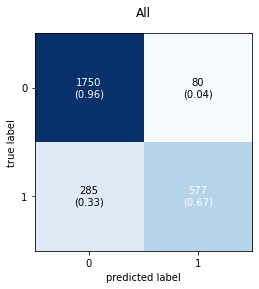

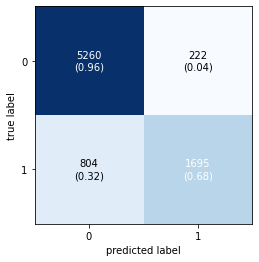

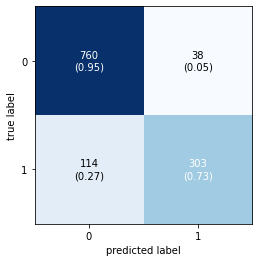

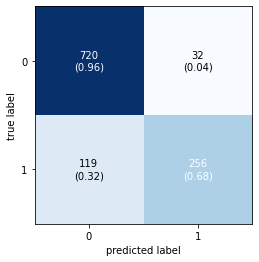

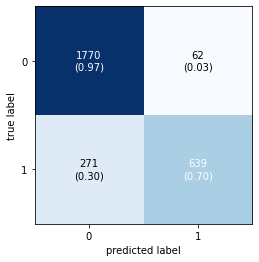

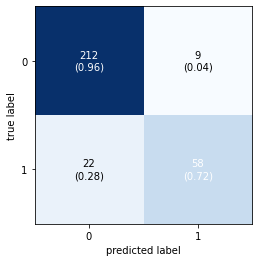

In [72]:
from sklearn import metrics as metrics
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix


Y_test = dataY_test
Y_hat = y_hat_score


Y_test = dataY_test
Y_hat = y_hat_score

cfm = metrics.confusion_matrix(Y_test, Y_hat, labels = [0, 1])

fig, ax = plot_confusion_matrix(conf_mat=cfm,
                                show_absolute=True,
                                show_normed=True,
                                colorbar=False)
ax.set_title('All') 
plt.show()


#Black


Y_test = Y_black
Y_hat = y_hat_black


cfm = metrics.confusion_matrix(Y_test, Y_hat, labels = [0, 1])
fig, ax = plot_confusion_matrix(conf_mat=cfm,
                                show_absolute=True,
                                show_normed=True,
                                colorbar=False)
ax.set_title('Black') 
plt.show()


#White

Y_test = Y_white
Y_hat = y_hat_white

cfm = metrics.confusion_matrix(Y_test, Y_hat, labels = [0, 1])
fig, ax = plot_confusion_matrix(conf_mat=cfm,
                                show_absolute=True,
                                show_normed=True,
                                colorbar=False)
ax.set_title('White') 
plt.show()

#Black Hispanic

Y_test = Y_black_hispanic
Y_hat = y_hat_black_his

cfm = metrics.confusion_matrix(Y_test, Y_hat, labels = [0, 1])
fig, ax = plot_confusion_matrix(conf_mat=cfm,
                                show_absolute=True,
                                show_normed=True,
                                colorbar=False)
ax.set_title('Black Hispanic') 
plt.show()

#White Hispanic


Y_test = Y_white_hispanic
Y_hat = y_hat_white_his

cfm = metrics.confusion_matrix(Y_test, Y_hat, labels = [0, 1])
fig, ax = plot_confusion_matrix(conf_mat=cfm,
                                show_absolute=True,
                                show_normed=True,
                                colorbar=False)
ax.set_title('White Hispanic') 
plt.show()

#Asian


Y_test = Y_asian_pacific
Y_hat = y_hat_asian_pa

cfm = metrics.confusion_matrix(Y_test, Y_hat, labels = [0, 1])
fig, ax = plot_confusion_matrix(conf_mat=cfm,
                                show_absolute=True,
                                show_normed=True,
                                colorbar=False)
ax.set_title('Asian') 
plt.show()

#no native americans, optional
#y_hat_na_indi, Y_na_indian

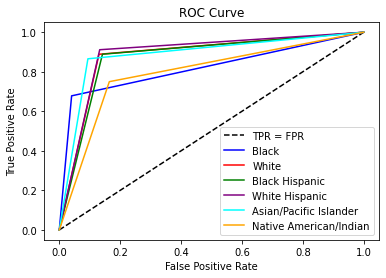

In [ ]:
#Scrap this section, because we are not dealing with thresholds!
#line plot

%matplotlib inline 
import matplotlib.pyplot as plt

fpr_black, tpr_black, thresholds = metrics.roc_curve(Y_black, y_hat_black)
fpr_white, tpr_white, thresholds = metrics.roc_curve(y_hat_white, Y_white)
fpr_black_his, tpr_black_his, thresholds = metrics.roc_curve(y_hat_black_his, Y_black_hispanic)
fpr_white_his, tpr_white_his, thresholds = metrics.roc_curve(y_hat_white_his, Y_white_hispanic)
fpr_asian_pa, tpr_asian_pa, thresholds = metrics.roc_curve(y_hat_asian_pa, Y_asian_pacific)
fpr_na_indi, tpr_na_indi, thresholds = metrics.roc_curve(y_hat_na_indi, Y_na_indian)


plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot([0, 1], [0, 1], 'k--', label="TPR = FPR")
plt.plot(fpr_black, tpr_black, color='blue', label="Black")
plt.plot(fpr_white, tpr_white, color='red', label="White")
plt.plot(fpr_black_his, tpr_black_his, color='green', label="Black Hispanic")
plt.plot(fpr_white_his, tpr_white_his, color='purple', label="White Hispanic")
plt.plot(fpr_asian_pa, tpr_asian_pa, color='cyan', label="Asian/Pacific Islander")
plt.plot(fpr_na_indi, tpr_na_indi, color='orange', label="Native American/Indian")

plt.legend()
plt.show()


# ***Things to Note...***
"Trash in, trash out" - unknown

## Data Quality Issues
> ### Representativeness
> #### **Preprocessing**: 
We were merciless with the data we used for our model. We only accepted feature vectors with sufficient data and dropped all those that had *any* instance of values we could not use. We did not prioritise reprensativeness and it led to an extremely harmful (and incorrect) model. This is apparent when you compare the proporiton of arrests over the entire dataset and the "cleaned" dataset (0.32, 0.93). 
> #### **Noise and Sparse Data**: 
Looking at the original 2019 dataset, it is easy to see major data quality issues. This arises when officers and supervisors do not document and review all of their stops per their protocol ([NY Times](https://www.nytimes.com/2019/11/17/nyregion/bloomberg-stop-and-frisk-new-york.html)). Officers are more likely to record incidents properly when an arrest is made. So of the recorded stop-and-frisk incidents, the incidents that lead to an arrest are more likely to be robust in the data. This is apparent when we filter the data with respect to "SUSPECT_ARRESTED_FLAG" and a "Y" (or yes) value. Now look at the data when we filter with respect to "FRISKED_FLAG" and a "Y" value again. Note the difference in quality of the filtered data. Because of this, during the  pre-processing step, stop-and-frisk incidents that led to arrests were more favored. 

## Data Bias
> #### **Population Bias**:
There are significant differences in demographics in the dataset. Of the 13,459 stops recorded, 59% were Black and 29% were Hispanic or Latinx. Less than 10% were White. 
> #### **Behaviorial Bias**:
Not all of the officers are reporting every one of their incidents and when they do, the quality and descriptions of the report will be different for each person. For example, while on the scene, one officer describes the suspect as "NORMAL" and another officer describes the suspect as "APPARENTLY NORMAL". The two officers described the same person, but their interpretations are slightly different. 



https://www.nyclu.org/en/stop-and-frisk-data

#Things We Would Change or Look into Further
We predicted on arrests, data is for stop-and-frisk. Maybe next time we try to predict on "FRISKED_FLAG".  

INSERT STUFF HERE
